<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Informe%205%20Bucket%20Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Problema de Ordenamiento**



Un sistema, sin importar su tamaño, funcionará mejor cuando todo está en perfecto orden. Es por esto que se requiere que los datos se encuentren en un orden óptimo para ser utilizados por lo que en este informe se expondrá una de las soluciones ya existentes para el ordenamiento de datos, el cual recibe el nombre de **"Bucket Sort"**.

A continuación, se definen los datos de entrada y salida del algoritmo que solucionará el problema.

**Entrada**: Arreglo o Lista de N datos comparables, tal que cada dato i pertenezca al intervalo [0,1].

*Si se ingresa un arreglo o lista de datos heterogeneos, el algoritmo  no será  capaz de ordenarlos.*

**Salida**: Arreglo o Lista con los N datos ordenados de forma ascendente.

El tamaño del problema lo indica la cantidad de datos de entrada, el cual corresponde a **N**.
 

# **2. Descripción del Algoritmo**

El Bucket Sort es un algoritmo el cual distribuye los elementos del arreglo de entrada en distintos "baldes".

Para insertar los elementos en los baldes, se debe cumplir una determinada condición. Las condiciones de los baldes deben ser excluyentes entre si.

Una vez distribuidos los elementos en sus respectivos baldes, estos últimos se ordenan independientemente con otro algoritmo de ordenamiento (para este informe se utilizará el Insertion Sort). 

Finalmente se transportan los elementos de cada balde a un arreglo de largo n igual al del arreglo de entrada.


### **2.1 Ejemplo de Implementación**

**Paso 1**: Creación de los Buckets.
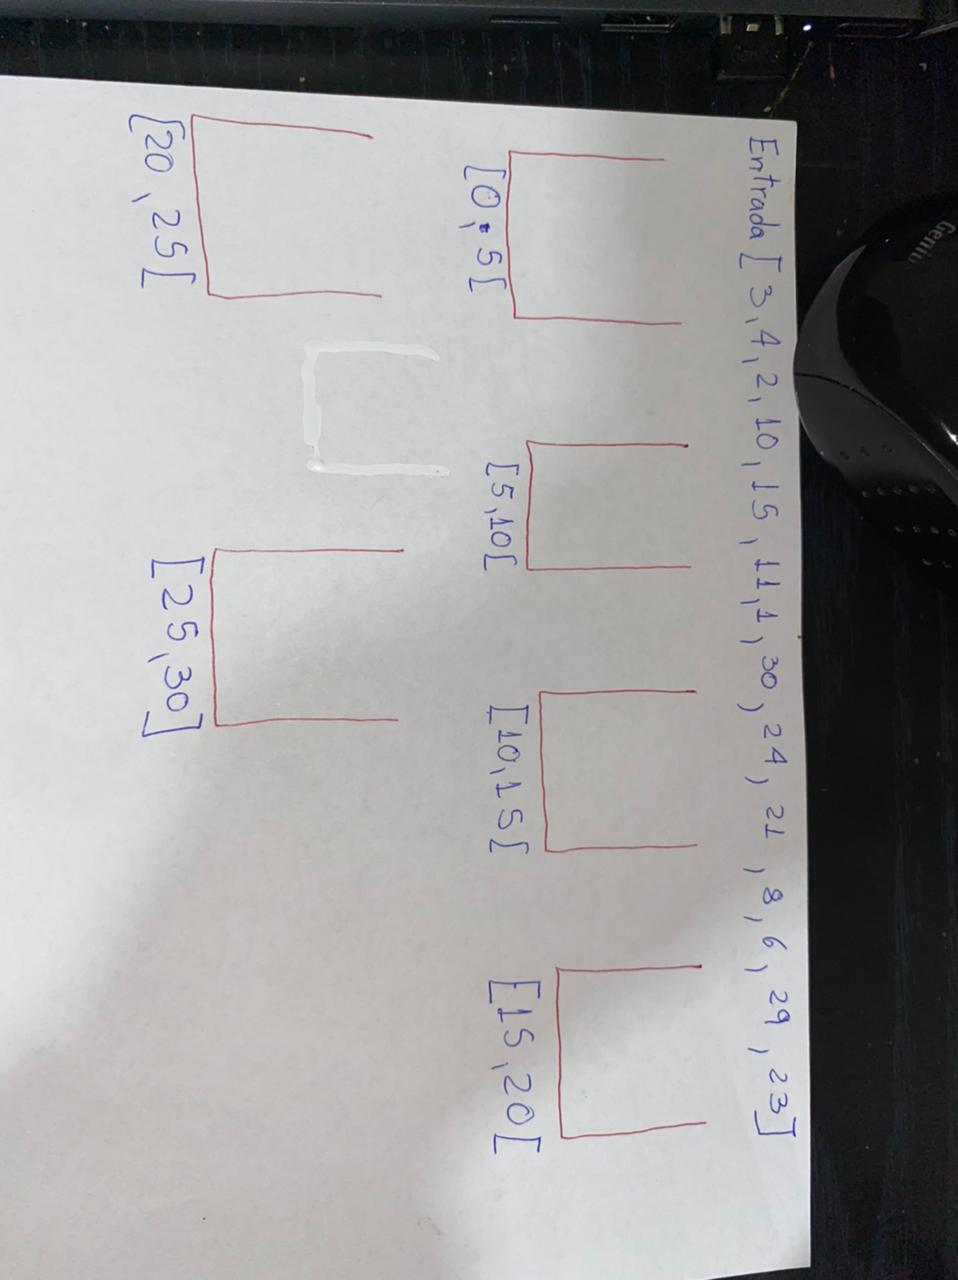

Paso 2: Asignación de los elementos del arreglo de entrada a sus respectivos buckets.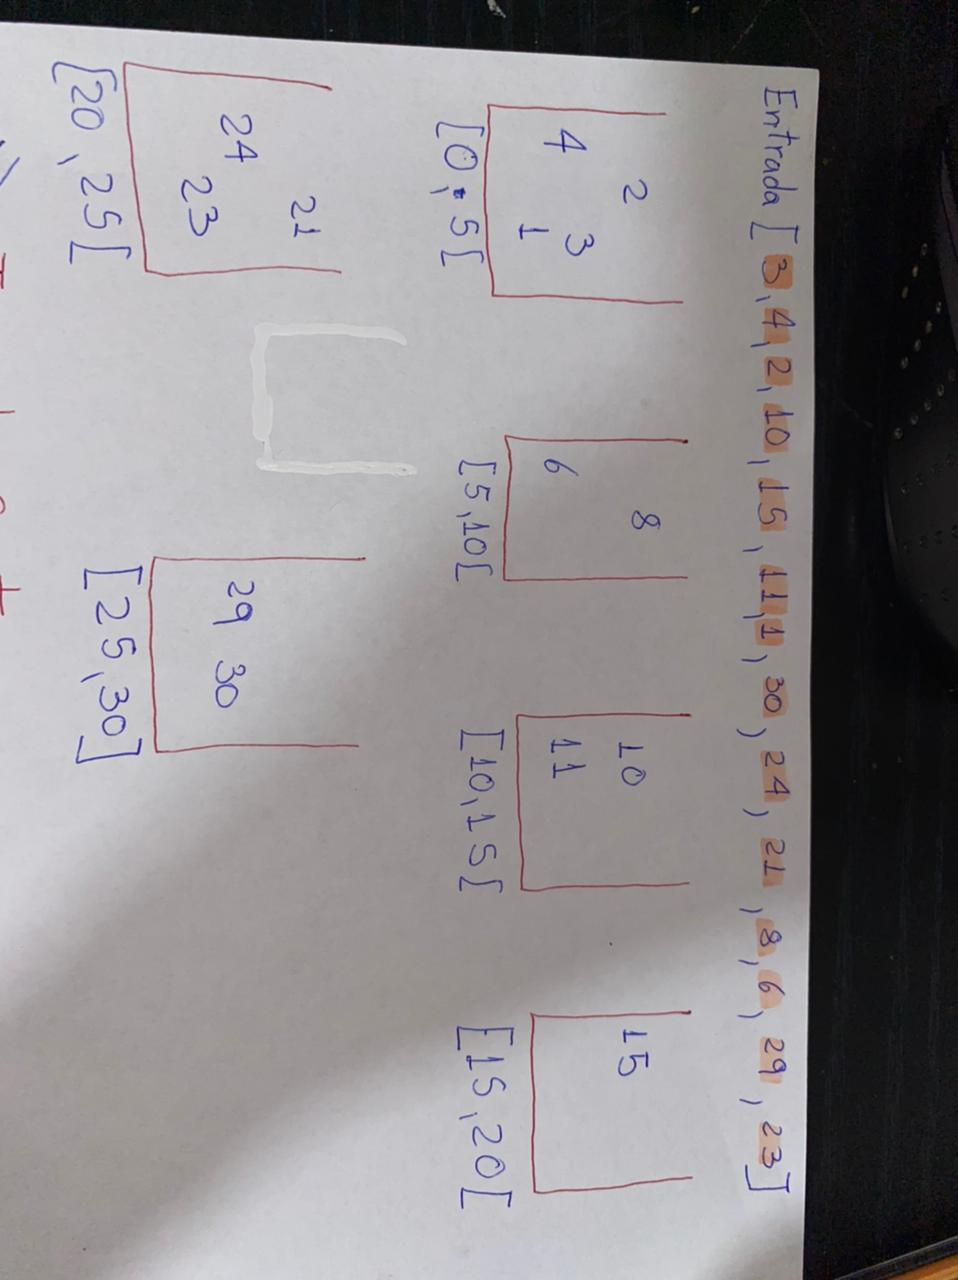

Paso 3: Ordenación de cada Bucket mediante Insertio Sort.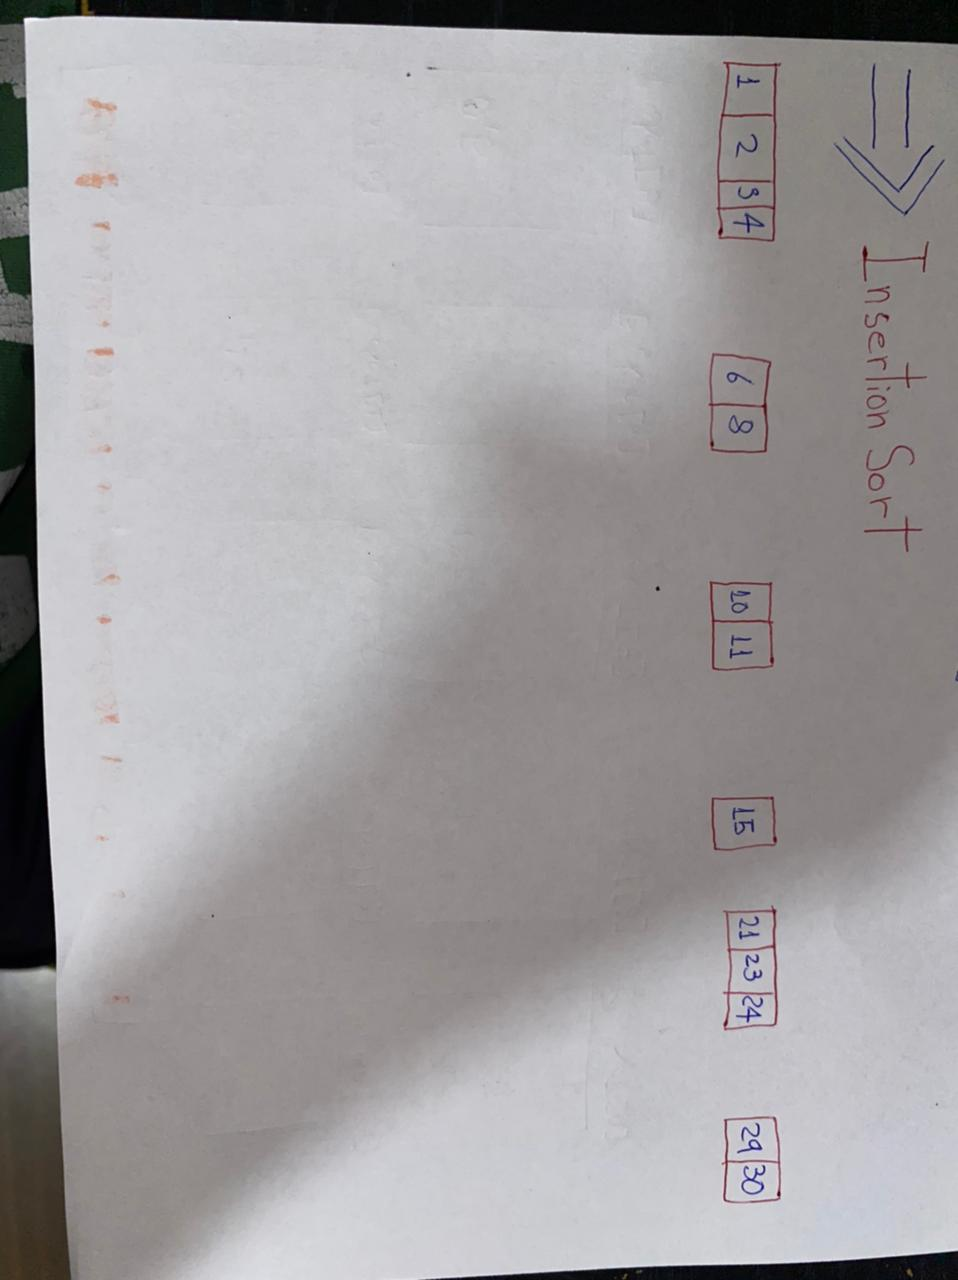

Paso 4: Traspaso de los elementos de los Buckets ordenados al arreglo de salida.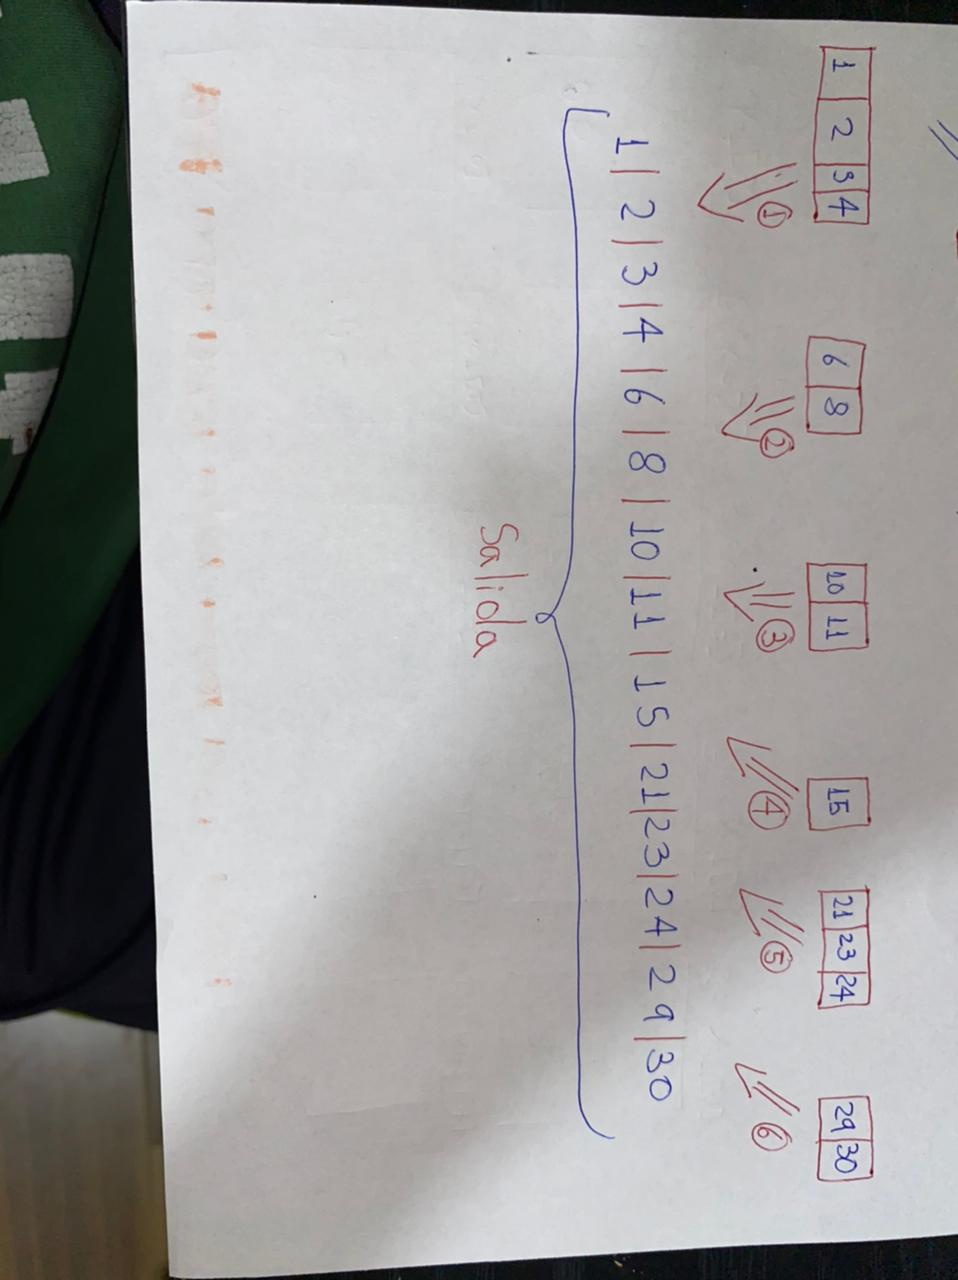

### **2.2 Código**

In [88]:
def ins_sort(a): #funcion que ordena los buckets con el método de insertion sort.
    n = len(a);
    for i in range(1, n):
        k = a[i]
        for j in range(i-1, -1, -1):
            if k < a[j]:
                a[j+1] = a[j]
                j-=1
        a[j+1] = k
    return a

#Bucket Sort
def bs(a,verbose): 
  
    n = len(a); #largo del arreglo
   
    b = []
    for i in range (n): #Creación de arreglo de buckets 
        b.append([])
    #Inserción de los elementos a su bucket respectivo
    for i in range(n):
      
        index = int(n*a[i])
        if(verbose == True):
          print("El elemento ", a[i], " se ingrese en el balde de índice ", index,"\n")
        
        b[index].append(a[i])
    index = 0

    for i in range(len(b)):
        bucket = b[i]

        ins_sort(bucket) #Ordenamiento de buckets
        for j in range(len(bucket)):#Traspaso de los elementos de los buckets al arreglo de salida
            a[index] = bucket[j]
           
            index+=1
       
    return a
    
array = []
for k in range(15):
    b = random.random()
    array.append(b)
#salida = []    
salida = bs(array, False)
print("Arreglo de salida ")
print(salida)

Arreglo de salida 
[0.04020366722937063, 0.06841406540919859, 0.1440095280860325, 0.21493607899444733, 0.22355219544963234, 0.34130200665046273, 0.36767748573728953, 0.4840766101263487, 0.5314231198712939, 0.6600496232079238, 0.6826372870068858, 0.7099002490530312, 0.7872266100172703, 0.8963954490361467, 0.9799505376163085]


### **2.3 Ejemplo de Ejecución Paso a Paso con Verbose = True**

In [92]:
arrayPrueba = [0.45,0.9,0.12,0.1,0.34,0.86,0.95,0.01,0.46,0.73]
print("Arreglo de entrada", arrayPrueba)
bs(arrayPrueba, True)

Arreglo de entrada [0.45, 0.9, 0.12, 0.1, 0.34, 0.86, 0.95, 0.01, 0.46, 0.73]
El elemento  0.45  se ingrese en el balde de índice  4 

El elemento  0.9  se ingrese en el balde de índice  9 

El elemento  0.12  se ingrese en el balde de índice  1 

El elemento  0.1  se ingrese en el balde de índice  1 

El elemento  0.34  se ingrese en el balde de índice  3 

El elemento  0.86  se ingrese en el balde de índice  8 

El elemento  0.95  se ingrese en el balde de índice  9 

El elemento  0.01  se ingrese en el balde de índice  0 

El elemento  0.46  se ingrese en el balde de índice  4 

El elemento  0.73  se ingrese en el balde de índice  7 



[0.01, 0.1, 0.12, 0.34, 0.45, 0.46, 0.73, 0.86, 0.9, 0.95]

#**3. Tiempo de Ejecución**

Considerando una distribución uniforme de los datos, se asume que Bucket Sort tiene un tiempo de ejecución $O(n)$.



### **3.1 Prueba del Teorema**

Para probar el tiempo de ejecución planteado, se tiene en cuenta los 4 pasos que realiza el algoritmo:



1. Creación de n buckets que reciben elementos de [0,1], cada bucket almacena elementos en el rango de  $[0.1\cdot i,0.1\cdot(i+1)]$.
2. Insertar los elementos del arreglo de entrada en sus respectivos buckets.
3. Aplicar insertion sort a cada bucket.
4. Traspasar los datos de cada bucket al arreglo de salida.

El paso 1 y 2 del algoritmo poseen complejidad O(n) ya que lo que se realiza es la creación de  buckets y al insertar se recorren las n-1 posiciones del arreglo de entrada.

En el paso 3(insertion Sort) también lleva tiempo O(n) en promedio si todos los números están distribuidos uniformemente (mejor caso).

En el paso 4 posee complejidad tambien de O(n) ya que se recorren los n buckets y se traspasan sus elementos al arreglo de salida

De esta manera se concluye que el tiempo de ejecución para el mejor caso corresponde a O(n+k)

###**3.2 Caso Promedio**



Para el caso promedio donde la distrubición de los datos es aleatoria se obtiene lo siguiente: 
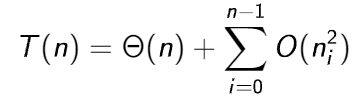

En este caso, el tiempo de ejecución corresponde a $O(n)$ más la sumatoria del ordenamiento de cada uno de los buckets, el cual mediante insertion sort tiene una complejidad de $O(n^2)$ ya que al no tener los datos distribuidos de manera uniforme, el insertion sort se vuelve de complejidad exponencial siendo este el caso promedio y peor caso teórico.


# **4. Correctitud**

Para probar la correctitud del algoritmo, se plantean 2 maneras, la primera de ellas aplicando la siguiente propiedad invariante de bucle: 

"En cada iteración, los elementos del bucket[i] son siempre menores que los de los bucket[i+k], siendo k > 0".

###**4.1 Prueba del Teorema**



**Inicialización**: En la primera iteración, los buckets se encuentran **vacios** por lo que la propiedad cumple con lo planteado como se muestra en la imagen.
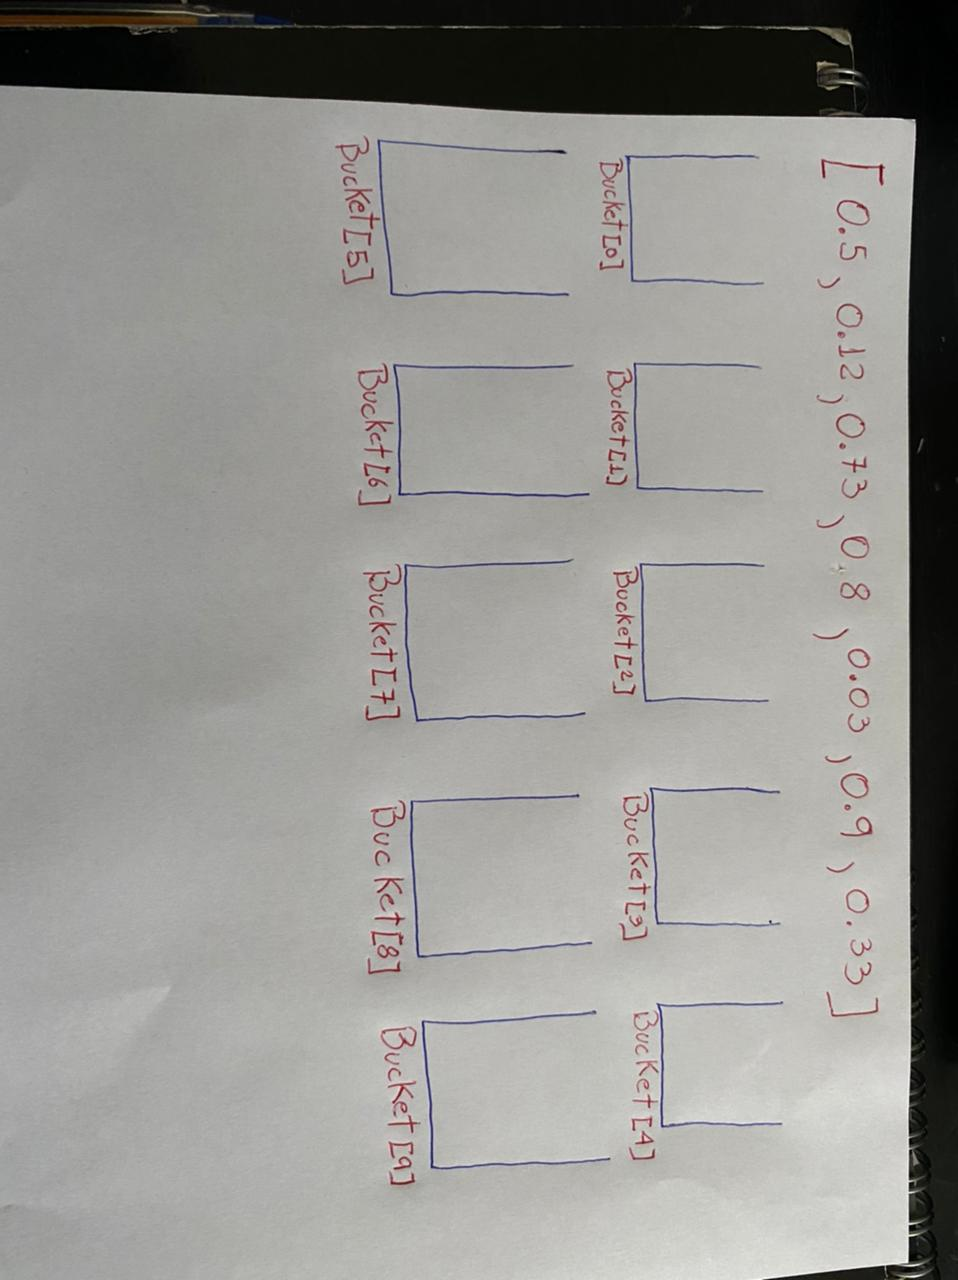

**Mantención**: En cada iteración, los elementos que se encuentran en el **bucket [i]** serán **menores** que los de cualquier bucket posterior **bucket[i+k]**.

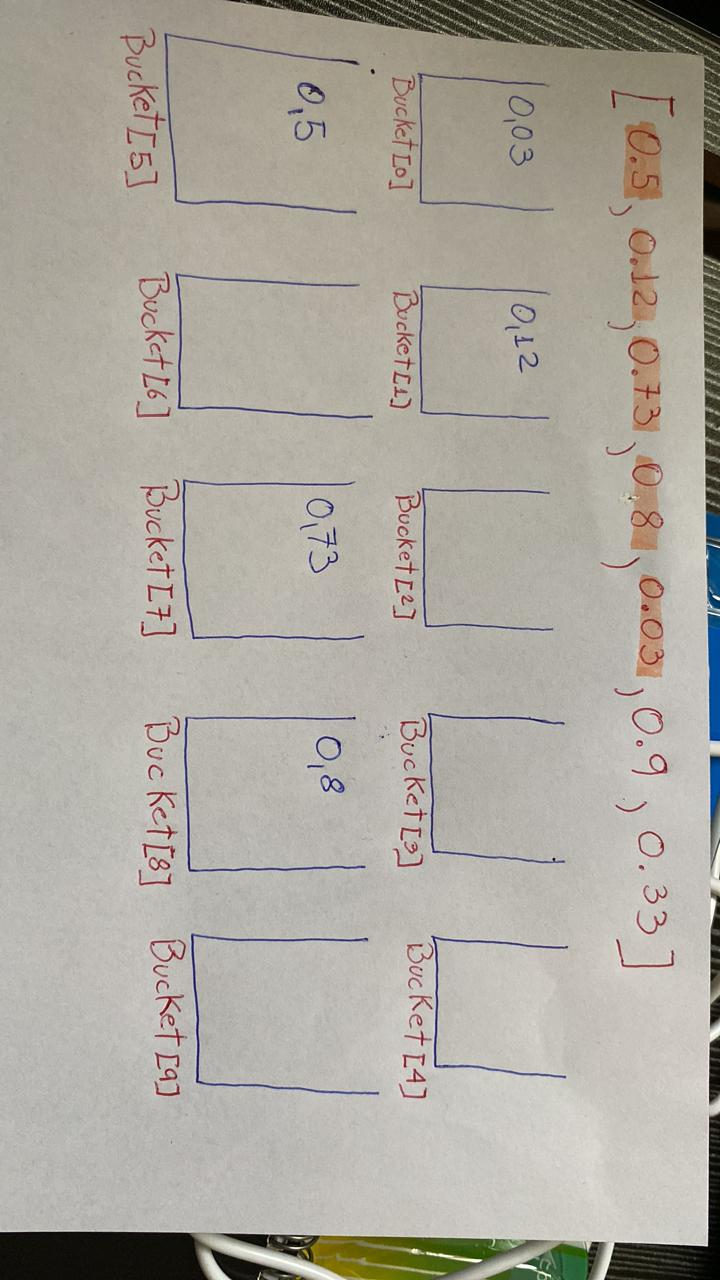

Como se observa en la imagen, si se compara por ejemplo el Bucket[5] (i) con el bucket[7] o bucket[8] (i+k), se cumple que 0.5 < 0.73 y 0.5 < 0.8 cumpliendose así la propiedad invariante de bucle planteada anteriormente.

###**4.2 Correctitud del Insertion Sort**
 
Otra forma de explicar la correctitud del algoritmo, es probando la de la función que se encarga de ordenar los buckets, a continuación se prueba que este algoritmo es correcto.

El algoritmo Insertion Sort genera un arreglo o lista con los mismos elementos del arreglo de entrada, ordenados de menor a mayor.

Para probar el teorema, se utilizará la siguiente propiedad invariante de bucle: 

***Al comienzo de cada iteración i del bucle más grande,los primeros i-1 elementos del arreglo estarán ordenados de menor a mayor***

Inicialización: Al inicio de la primera iteración (i=1), los primeros i-1 = 0 elementos se encuentran ordenados de menor a mayor.

Mantención: En inicio de cada iteración i, el arreglo tendrá los primeros i-1 elementos ordenados de menor a mayor. Durante cada iteración, se comparará el elemento de la posición arreglo[i] con las casillas a su izquierda, intercambiandose entre si hasta que los primeros i elementos queden ordenados de menor a mayor.

# **5. Experimentos**



###**5.1 Radix Sort v/s Bucket Sort**

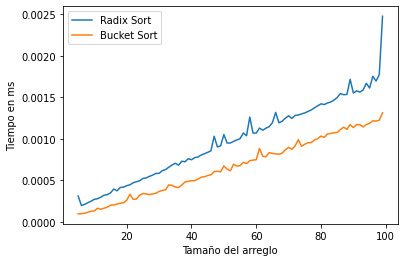

In [5]:
def countingSort(arr, exp1):
 
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
def radixSort(arr):
    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10
    return arr


def bucket_sort(input_list):
    
    max_value = max(input_list)
    size = max_value/len(input_list)

    
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    for z in range(len(input_list)):
        ins_sort(buckets_list[z])
            
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

 
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,100):
  a = random.sample(range(1, 1000), n)
  t1 = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Radix Sort", "Bucket Sort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **5.1.1 Análisis de Resultados**

Como se observa en la gráfica, se concluye que al utilizar radix sort con counting sort, este tiene un tiempo de ejecución **más lento** que el de Bucket sort ya que Radix requiere de llamar a counting sort **I** veces, siendo **I** la **cantidad de dígitos** del número mayor del arreglo de entrada.

### **5.2 Bucket sort para enteros v/s Bucket sort para valores decimales entre 0 y 1**

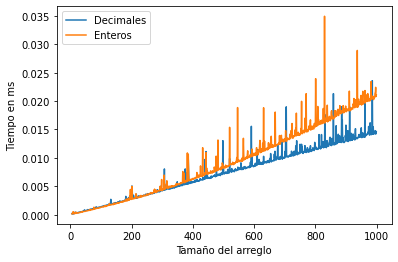

In [25]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,1000):
  
  a = random.sample(range(1, 1000), n)
  array = []
  for k in range(len(a)):
    b = random.random()
    array.append(b)

 
  t1 = repeat(setup="from __main__ import bs", stmt=f"bs({array})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Decimales", "Enteros"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **5.2.1 Análisis de resultados**

Se concluye a partir del gráfico que en arreglos cuyo tamaño va en un rango de 1 a 500, el bucket sort **no tiene grandes diferencias en el tiempo de ejecución cuando los datos son enteros o decimales**. Ya considerando arreglos de un tamaño mayor a 500 se puede observar una demora extra cuando los datos son de tipo entero, ya que el **rango** de los elementos puede volverse mucho mayor con el aumento del tamaño del arreglo mientras que con datos de 0 a 1 el rango es más acotado.

### **5.3 ¿ Qué ocurre si en vez de Insertion Sort se utiliza Heap Sort para ordenar los buckets ?**

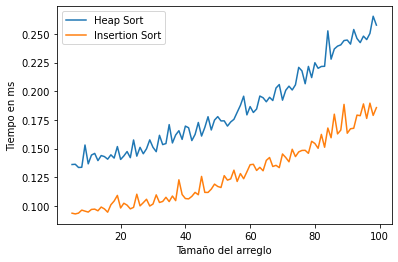

In [29]:
def build_heap(A, n):
   for i in range(n//2 - 1, -1, -1):
      heapify(A, n, i)

def heapify(A, n, i):
  left = 2*i + 1
  right = 2*i + 2
  largest = i

  if left < n and A[left] > A[largest]:
    largest = left

  if right < n and A[right] > A[largest]:
    largest = right

  if largest != i:
    A[i], A[largest] = A[largest], A[i]
    heapify(A, n, largest)

def heap_sort(A):
  n = len(A)
  build_heap(A, n)

  for i in range(n-1, 0, -1):
    A[0], A[i] = A[i], A[0]
    heapify(A, i, 0)


def bsHeap(a):
  
    n = len(a);
   
    b = []
    for i in range (n):
        b.append([])

    # print(b)
    for i in range(n):
        index = int(n*a[i])
        #print(index)
        b[index].append(a[i])
    index = 0
    for i in range(len(b)):
        bucket = b[i]
        heap_sort(bucket)
        for j in range(len(bucket)):
            a[index] = bucket[j]
            index+=1
    return a
  
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,100):
  for k in range(n):
    b = random.random()
    array.append(b)
  t1 = repeat(setup="from __main__ import  bsHeap", stmt=f"bsHeap({array})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bs", stmt=f"bs({array})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Heap Sort", "Insertion Sort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()


### **5.3.1 Análisis de Resultados**

Se concluye d ela gráfica que a pesar de ser heap sort un algoritmo que posee una complejidad** menor** a la de insertion sort, este último genera una mayor eficiencia en tiempo de ejecución del algoritmoo de Bucket Sort debido a su **estabilidad**.